In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_attack_south_africa.csv to heart_attack_south_africa.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('heart_attack_south_africa.csv')

# Preview data
df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


<ipython-input-3-3391679546>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Heart_Attack_Outcome'] == 1], x='Age', shade=True, bw_adjust=0.5, label='Heart Attack', color='red')
<ipython-input-3-3391679546>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Heart_Attack_Outcome'] == 0], x='Age', shade=True, bw_adjust=0.5, label='No Heart Attack', color='blue')


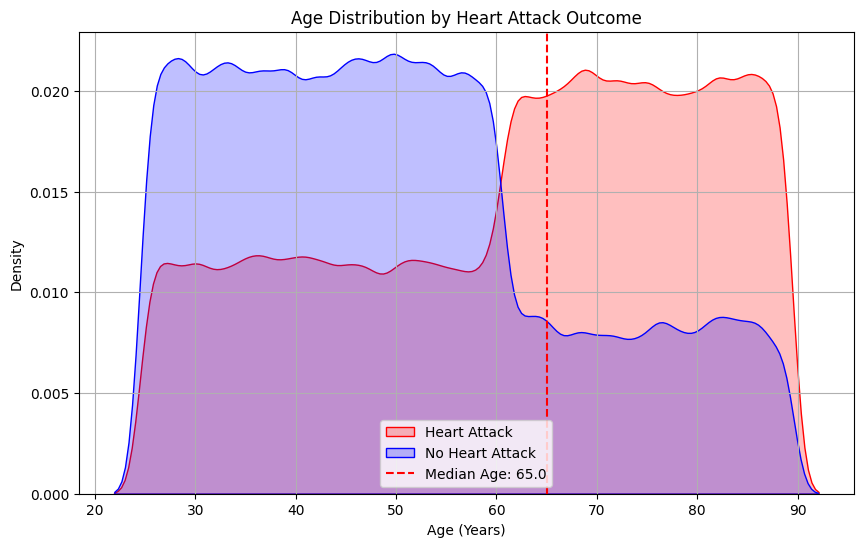

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['Heart_Attack_Outcome'] == 1], x='Age', shade=True, bw_adjust=0.5, label='Heart Attack', color='red')
sns.kdeplot(data=df[df['Heart_Attack_Outcome'] == 0], x='Age', shade=True, bw_adjust=0.5, label='No Heart Attack', color='blue')

# Add vertical line for median
median_age = df[df['Heart_Attack_Outcome'] == 1]['Age'].median()
plt.axvline(median_age, color='red', linestyle='--', label=f'Median Age: {median_age:.1f}')

plt.title('Age Distribution by Heart Attack Outcome')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

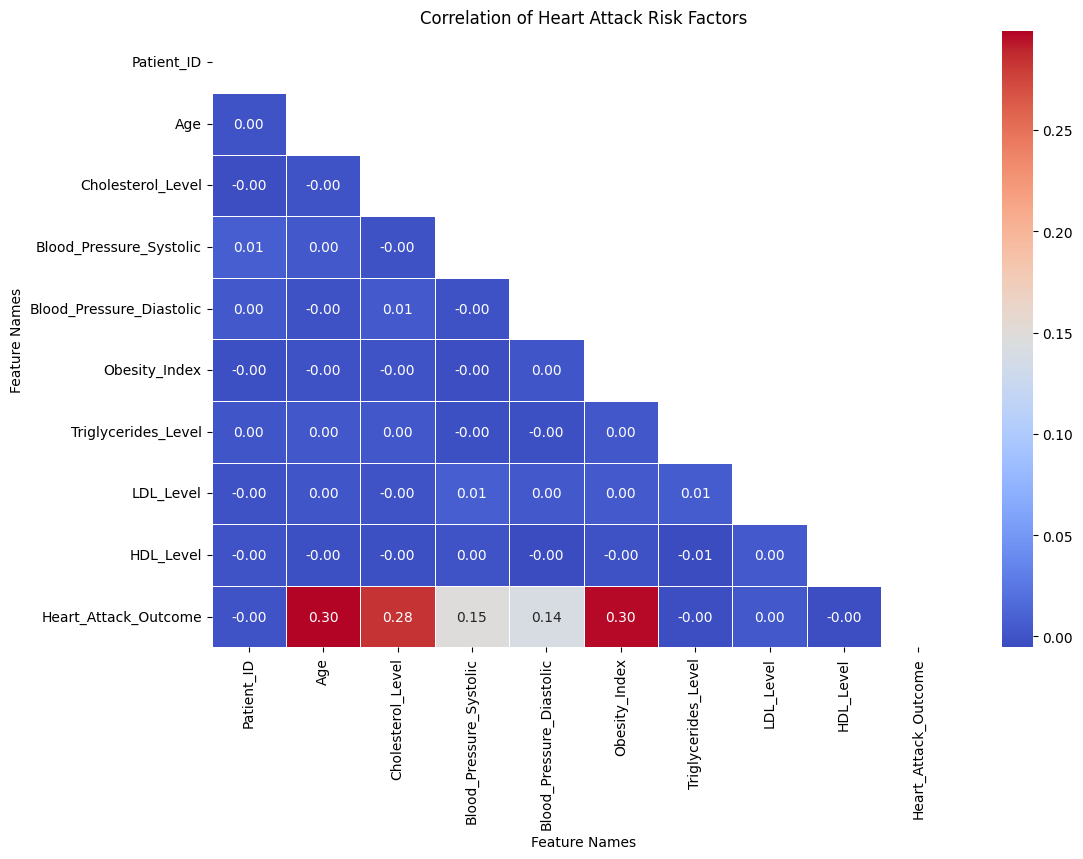

In [ ]:
# Compute correlation matrix using only numeric columns
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Generate mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation of Heart Attack Risk Factors')
plt.xlabel('Feature Names')
plt.ylabel('Feature Names')
plt.show()

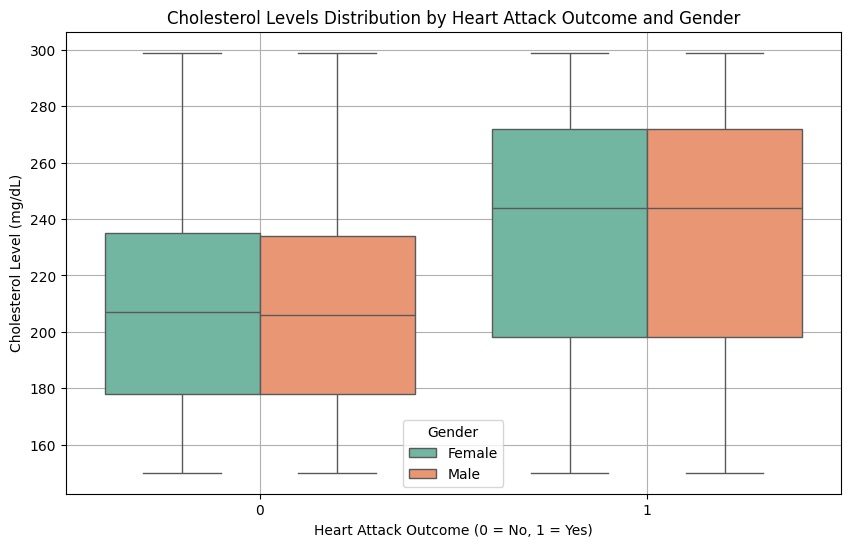

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Heart_Attack_Outcome', y='Cholesterol_Level', hue='Gender', palette='Set2')

plt.title('Cholesterol Levels Distribution by Heart Attack Outcome and Gender')
plt.xlabel('Heart Attack Outcome (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.grid(True)
plt.show()

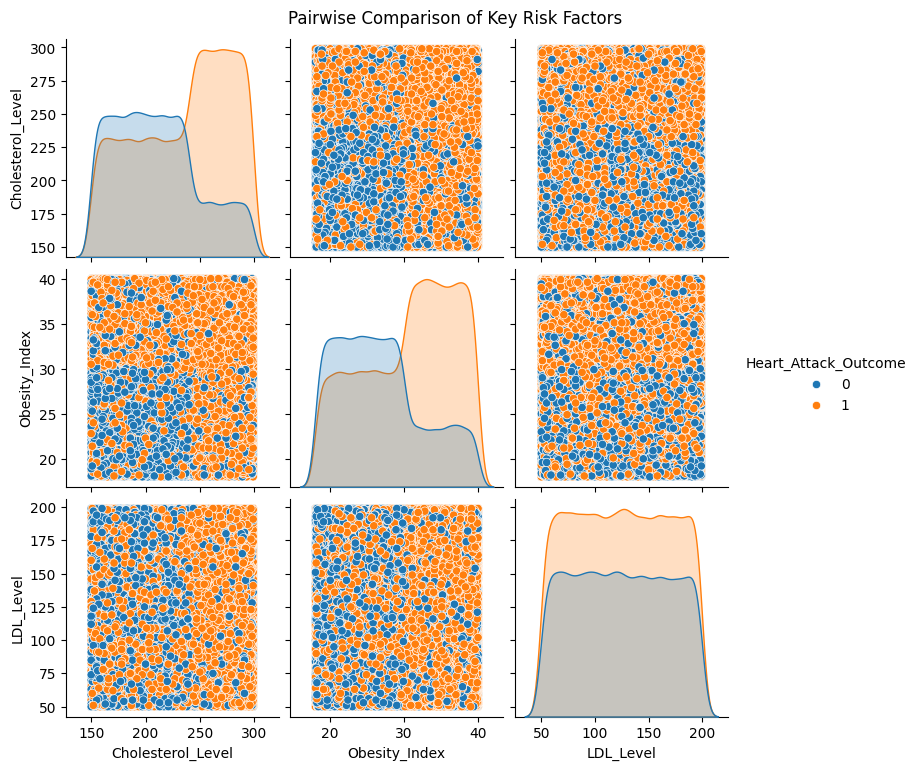

In [ ]:
# Select columns of interest
columns = ['Cholesterol_Level', 'Obesity_Index', 'LDL_Level', 'Heart_Attack_Outcome']

# Pairplot
sns.pairplot(df[columns], hue='Heart_Attack_Outcome', diag_kind='kde', height=2.5)

plt.suptitle('Pairwise Comparison of Key Risk Factors', y=1.02)
plt.show()

<Figure size 1200x1000 with 0 Axes>

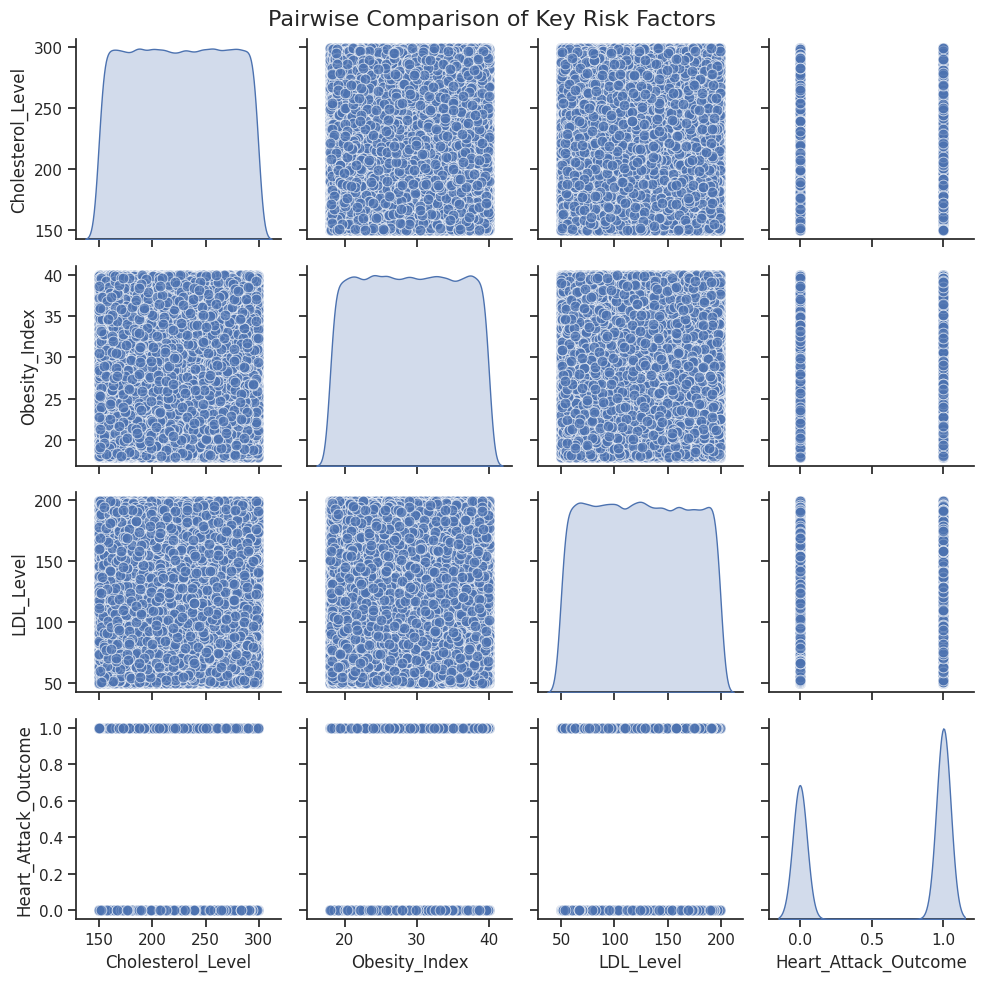

In [ ]:
# Set the plot size
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(12, 10))

# Create the pairplot
pairplot = sns.pairplot(
    df,
    vars=["Cholesterol_Level", "Obesity_Index", "LDL_Level", "Heart_Attack_Outcome"],
    diag_kind="kde",
    plot_kws={"s": 60, "alpha": 0.7}
)

pairplot.fig.suptitle("Pairwise Comparison of Key Risk Factors", fontsize=16)
pairplot.fig.tight_layout()
pairplot.fig.subplots_adjust(top=0.95)


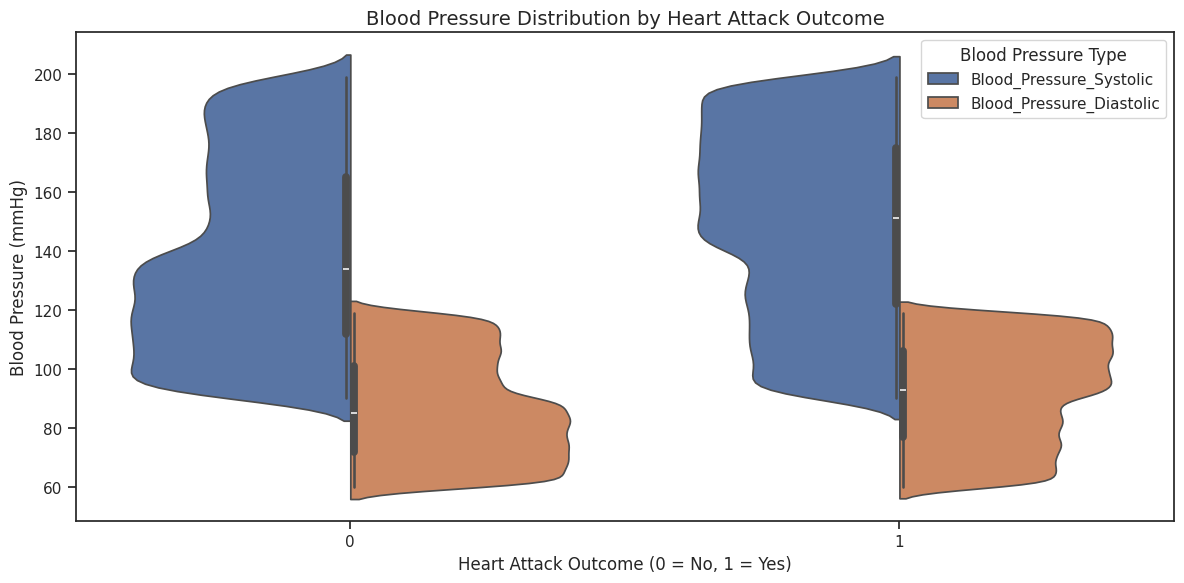

In [ ]:
plt.figure(figsize=(12, 6))

# Melt the DataFrame for sns.violinplot
bp_df = df.melt(id_vars="Heart_Attack_Outcome",
                value_vars=["Blood_Pressure_Systolic", "Blood_Pressure_Diastolic"],
                var_name="BP_Type",
                value_name="Value")

sns.violinplot(
    x="Heart_Attack_Outcome",
    y="Value",
    hue="BP_Type",
    data=bp_df,
    split=True
)

plt.title("Blood Pressure Distribution by Heart Attack Outcome", fontsize=14)
plt.xlabel("Heart Attack Outcome (0 = No, 1 = Yes)")
plt.ylabel("Blood Pressure (mmHg)")
plt.legend(title="Blood Pressure Type")
plt.tight_layout()


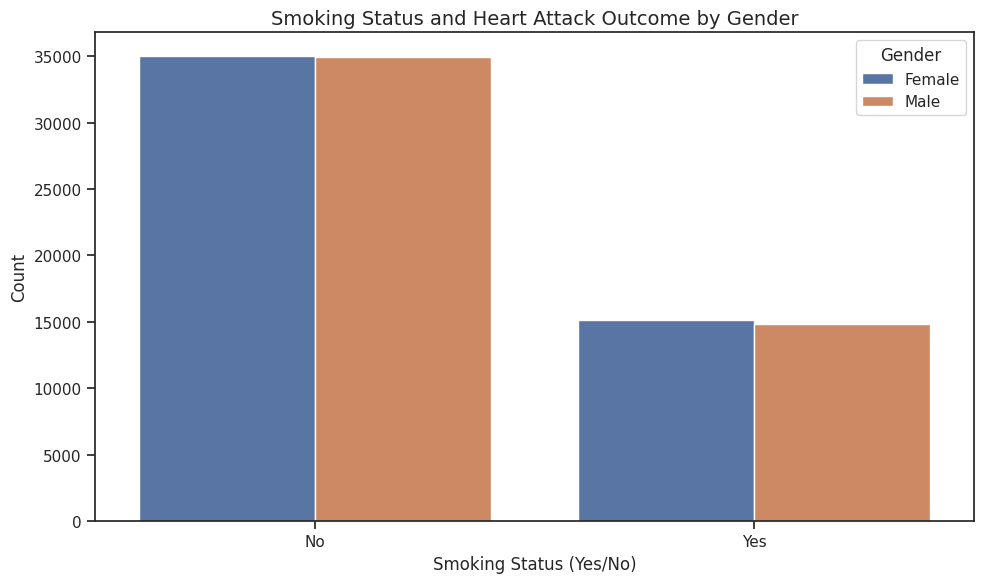

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x="Smoking_Status",
    hue="Gender"
)

plt.title("Smoking Status and Heart Attack Outcome by Gender", fontsize=14)
plt.xlabel("Smoking Status (Yes/No)")
plt.ylabel("Count")
plt.tight_layout()
